<a href="https://colab.research.google.com/github/Kyssuber/Information/blob/master/ThermalPhysicsGroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 3.24 -- **

Use a computer to study the entropy, temperature, and heat capacity of an Einstein solid, as follows.

N = 50 \
q_tot = 100 \
Use separate columns for the energy, multiplicity, entropy, temperature, and heat capcity. To calculate the temperature, evaluate $\frac{\Delta U}{\Delta S}$ for the two nearby rowd in the table. (Recall that $U = q\epsilon$ for some constant $\epsilon$.) The heat capacity, $\frac{\Delta U}{\Delta T}$, can be computed in a similar way. The first few rows of the table are

q = 0, 1, 2 \
$\Omega$ = 1, 50, 1275 \
S/k = 0, 3.91, 7.15 \
kT/$\epsilon$ = 0, 0.28, 0.33 \
C/Nk = ---, 0.12, 0.45 \
Make a graph of entropy vs. energy and a graph of heat capacity vs. temperature. Discuss your prediction for the heat capacity, and compare it to the data for lead, aluminum, and diamond shown in Figure 1.14. Estimate the numerical value of $\epsilon$, in eV, for each of those real solids.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from math import factorial #Python trickery :-)

In [2]:
q = np.arange(0,101,1)
print(q)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [0]:
N = 50

In [4]:
#For aesthetic purposes, I create two arrays of the multiplicity values: the first is for calculation purposes,
#while the second is truncated up to two decimal places to faciliate reading of the values. I proceed with this
#technique for each of the columns needed for the table.

multiplicity = [] #for calculations
multiplicity_table = [] #for aesthetics
for i in q:
  mult_q = factorial(N+i-1)/(factorial(i)*factorial(N-1))
  multiplicity.append(mult_q)
  mult_q = '{:.2e}'.format(mult_q) #truncates to two decimal places, writes number in scientific notation
  multiplicity_table.append(mult_q)
multiplicity = np.array(multiplicity) #conversion to numpy array; more practical for math functions
multiplicity_table = np.array(multiplicity_table)
print(multiplicity_table)

['1.00e+00' '5.00e+01' '1.28e+03' '2.21e+04' '2.93e+05' '3.16e+06'
 '2.90e+07' '2.32e+08' '1.65e+09' '1.06e+10' '6.28e+10' '3.43e+11'
 '1.74e+12' '8.31e+12' '3.74e+13' '1.60e+14' '6.48e+14' '2.52e+15'
 '9.36e+15' '3.35e+16' '1.16e+17' '3.85e+17' '1.24e+18' '3.89e+18'
 '1.18e+19' '3.51e+19' '1.01e+20' '2.85e+20' '7.83e+20' '2.11e+21'
 '5.54e+21' '1.43e+22' '3.62e+22' '9.00e+22' '2.20e+23' '5.27e+23'
 '1.24e+24' '2.89e+24' '6.63e+24' '1.49e+25' '3.33e+25' '7.30e+25'
 '1.58e+26' '3.38e+26' '7.15e+26' '1.49e+27' '3.09e+27' '6.30e+27'
 '1.27e+28' '2.55e+28' '5.04e+28' '9.89e+28' '1.92e+29' '3.70e+29'
 '7.05e+29' '1.33e+30' '2.50e+30' '4.65e+30' '8.58e+30' '1.57e+31'
 '2.85e+31' '5.14e+31' '9.21e+31' '1.64e+32' '2.89e+32' '5.07e+32'
 '8.83e+32' '1.53e+33' '2.63e+33' '4.50e+33' '7.65e+33' '1.29e+34'
 '2.17e+34' '3.63e+34' '6.04e+34' '9.98e+34' '1.64e+35' '2.69e+35'
 '4.37e+35' '7.09e+35' '1.14e+36' '1.83e+36' '2.93e+36' '4.66e+36'
 '7.38e+36' '1.16e+37' '1.83e+37' '2.85e+37' '4.44e+37' '6.89e

In [0]:
entropy_norm = []
entropy_norm_table = []
for i in multiplicity:
  S_k = np.log(i) #S = k*ln(multiplicity)
  entropy_norm.append(S_k)
  S_k = '%.2f' % S_k #truncates to two decimal places
  entropy_norm_table.append(S_k)
entropy_norm = np.array(entropy_norm)
entropy_norm_table = np.array(entropy_norm_table)

In [6]:
print(entropy_norm_table)

['0.00' '3.91' '7.15' '10.00' '12.59' '14.97' '17.18' '19.26' '21.23'
 '23.09' '24.86' '26.56' '28.19' '29.75' '31.25' '32.70' '34.10' '35.46'
 '36.78' '38.05' '39.29' '40.49' '41.66' '42.81' '43.92' '45.00' '46.06'
 '47.10' '48.11' '49.10' '50.07' '51.02' '51.94' '52.85' '53.75' '54.62'
 '55.48' '56.32' '57.15' '57.97' '58.77' '59.55' '60.33' '61.09' '61.83'
 '62.57' '63.30' '64.01' '64.71' '65.41' '66.09' '66.76' '67.43' '68.08'
 '68.73' '69.37' '69.99' '70.61' '71.23' '71.83' '72.43' '73.02' '73.60'
 '74.18' '74.74' '75.31' '75.86' '76.41' '76.95' '77.49' '78.02' '78.54'
 '79.06' '79.58' '80.09' '80.59' '81.09' '81.58' '82.07' '82.55' '83.03'
 '83.50' '83.97' '84.43' '84.89' '85.35' '85.80' '86.24' '86.69' '87.13'
 '87.56' '87.99' '88.42' '88.84' '89.26' '89.68' '90.09' '90.50' '90.90'
 '91.31' '91.70']


In [0]:
#recall T is represented as kT/epsilon, so T is simply q2-q1 / S2-S1
temp_norm = [] 
temp_norm_table = []
for n in range(0,100):
  if n == 0:
    temp_norm.append(0) #we know from the given table the first T value.
    temp_norm_table.append(0)
  else:
    T_norm = (q[n+1] - q[n-1]) / (entropy_norm[n+1] - entropy_norm[n-1])
    temp_norm.append(T_norm)
    T_norm = '%.2f' % T_norm
    temp_norm_table.append(T_norm)
temp_norm = np.array(temp_norm)
temp_norm_table = np.array(temp_norm_table)

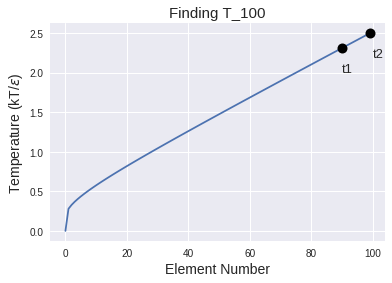

In [8]:
#The "centered difference" technique fails to calculate the temperature for q = 100
#so I will attempt to find it using a plot.

plt.figure()
plt.plot(np.arange(0,100,1),temp_norm)
plt.plot(99,temp_norm[99],'ko',markersize=10)
plt.plot(90,temp_norm[90],'ko',markersize=10)
plt.text(90,2,'t1',fontsize=13)
plt.text(100,2.2,'t2',fontsize=13)
plt.title('Finding T_100',fontsize=15)
plt.xlabel('Element Number',fontsize=14)
plt.ylabel('Temperature (kT/$\epsilon$)',fontsize=14)

#the slope between the two marked points appears constant

t2 = temp_norm[99]
t1 = temp_norm[90]
n2 = 99
n1 = 90
m = (t2-t1)/(n2-n1)

#find b

b = t2 - (m * n2)

#use y=mx+b to determine T at n = 100

T_100 = (m*100) + b

#add to the array! 

temp_norm = np.append(temp_norm,T_100)
T_100 = '%.2f' % T_100
temp_norm_table = np.append(temp_norm_table,T_100)

In [9]:
temp_norm_table

array(['0', '0.28', '0.33', '0.37', '0.40', '0.44', '0.47', '0.49',
       '0.52', '0.55', '0.58', '0.60', '0.63', '0.65', '0.68', '0.70',
       '0.73', '0.75', '0.77', '0.80', '0.82', '0.84', '0.86', '0.89',
       '0.91', '0.93', '0.95', '0.98', '1.00', '1.02', '1.04', '1.07',
       '1.09', '1.11', '1.13', '1.15', '1.17', '1.20', '1.22', '1.24',
       '1.26', '1.28', '1.30', '1.33', '1.35', '1.37', '1.39', '1.41',
       '1.43', '1.45', '1.47', '1.50', '1.52', '1.54', '1.56', '1.58',
       '1.60', '1.62', '1.64', '1.66', '1.69', '1.71', '1.73', '1.75',
       '1.77', '1.79', '1.81', '1.83', '1.85', '1.87', '1.89', '1.92',
       '1.94', '1.96', '1.98', '2.00', '2.02', '2.04', '2.06', '2.08',
       '2.10', '2.12', '2.14', '2.17', '2.19', '2.21', '2.23', '2.25',
       '2.27', '2.29', '2.31', '2.33', '2.35', '2.37', '2.39', '2.41',
       '2.44', '2.46', '2.48', '2.50', '2.52'], dtype='<U21')

In [0]:
#a similarly meticulous treatment of heat capacity is necessary, if 
#we are to apply the "centered difference" method

#let first entry of this column be 0

heatcap_norm = [] #C/Nk = (1/N) * (q2-q1) / (t2-t1)
heatcap_norm_table = []
for n in range(0,100):
  if n == 0:
    heatcap_norm.append(0) #we know from the given table the first C value.
    heatcap_norm_table.append(0)
  else:
    C_norm = (1/N) * (q[n+1] - q[n-1]) / (temp_norm[n+1] - temp_norm[n-1])
    heatcap_norm.append(C_norm)
    C_norm = '%.3f' % C_norm
    heatcap_norm_table.append(C_norm)
heatcap_norm = np.array(heatcap_norm)
heatcap_norm_table = np.array(heatcap_norm_table)

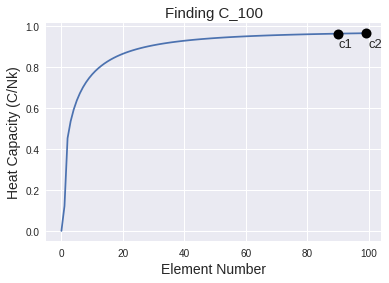

In [11]:
#Approximate normalized heat capacity for q = 100

plt.figure()
plt.plot(np.arange(0,100,1),heatcap_norm)
plt.plot(99,heatcap_norm[99],'ko',markersize=10)
plt.plot(90,heatcap_norm[90],'ko',markersize=10)
plt.text(90,.9,'c1',fontsize=13)
plt.text(100,.9,'c2',fontsize=13)
plt.title('Finding C_100',fontsize=15)
plt.xlabel('Element Number',fontsize=14)
plt.ylabel('Heat Capacity (C/Nk)',fontsize=14)

#the slope between the two marked points appears constant

c2 = heatcap_norm[99]
c1 = heatcap_norm[90]
n2 = 99
n1 = 90
m = (c2-c1)/(n2-n1)

#find b

b = c2 - (m * n2)

#use y=mx+b to determine C at n = 100

C_100 = (m*100) + b

#add to the array! 

heatcap_norm = np.append(heatcap_norm,C_100)
C_100 = '%.3f' % C_100
heatcap_norm_table = np.append(heatcap_norm_table,C_100)

In [12]:
heatcap_norm_table

array(['0', '0.122', '0.454', '0.536', '0.594', '0.638', '0.673', '0.702',
       '0.727', '0.748', '0.766', '0.781', '0.795', '0.808', '0.819',
       '0.829', '0.838', '0.846', '0.853', '0.860', '0.866', '0.872',
       '0.877', '0.882', '0.887', '0.891', '0.895', '0.899', '0.902',
       '0.905', '0.908', '0.911', '0.914', '0.916', '0.918', '0.921',
       '0.923', '0.925', '0.927', '0.928', '0.930', '0.932', '0.933',
       '0.935', '0.936', '0.937', '0.939', '0.940', '0.941', '0.942',
       '0.943', '0.944', '0.945', '0.946', '0.947', '0.948', '0.949',
       '0.950', '0.950', '0.951', '0.952', '0.952', '0.953', '0.954',
       '0.954', '0.955', '0.955', '0.956', '0.957', '0.957', '0.958',
       '0.958', '0.958', '0.959', '0.959', '0.960', '0.960', '0.961',
       '0.961', '0.961', '0.962', '0.962', '0.962', '0.963', '0.963',
       '0.963', '0.964', '0.964', '0.964', '0.965', '0.965', '0.965',
       '0.965', '0.966', '0.966', '0.966', '0.966', '0.967', '0.967',
       '0.966',

In [13]:
taybole = Table([q,multiplicity_table,entropy_norm_table,temp_norm_table,heatcap_norm_table],names=('q','Multiplicity', 'S_norm'
                                                                                             ,'T_norm','C/Nk'))
taybole.show_in_notebook(show_row_index=False) #I AM A MAGICIAN

q,Multiplicity,S_norm,T_norm,C/Nk
0,1.00e+00,0.00,0,0
1,5.00e+01,3.91,0.28,0.122
2,1.28e+03,7.15,0.33,0.454
3,2.21e+04,10.00,0.37,0.536
4,2.93e+05,12.59,0.40,0.594
5,3.16e+06,14.97,0.44,0.638
6,2.90e+07,17.18,0.47,0.673
7,2.32e+08,19.26,0.49,0.702
8,1.65e+09,21.23,0.52,0.727
9,1.06e+10,23.09,0.55,0.748


(0, 100)

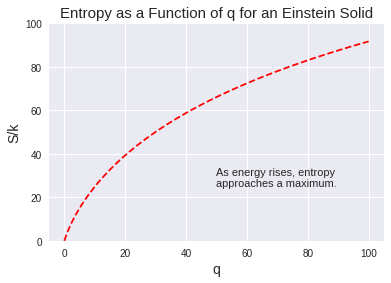

In [14]:
#Entropy vs. Energy Plot

plt.figure()
plt.plot(q,entropy_norm,'r--')
plt.title('Entropy as a Function of q for an Einstein Solid',fontsize=15)
plt.xlabel('q',fontsize=14)
plt.ylabel('S/k',fontsize=14)
plt.text(50,30,'As energy rises, entropy',fontsize=11)
plt.text(50,25,'approaches a maximum.',fontsize=11)
plt.ylim(0,100)

Text(0, 0.5, 'Heat Capacity (C/Nk)')

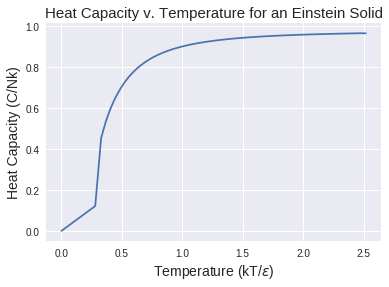

In [15]:
#Heat Capacity v. Temperature Plot
#This analytic solution generates a plot that is somewhat jagged at lower temps.

plt.figure()
plt.plot(temp_norm,heatcap_norm)
plt.title('Heat Capacity v. Temperature for an Einstein Solid',fontsize=15)
plt.xlabel('Temperature (kT/$\epsilon$)',fontsize=14)
plt.ylabel('Heat Capacity (C/Nk)',fontsize=14)

# PART TWO

In [0]:
import sys
import numpy as np
from math import log

In [0]:
#For q = 100 but N = 5000; the aim is to investigate the nature of a diluted
#Einstein solid (i.e. more scattering of energy units among the oscillators).

N = 5000

multiplicity = [] #for calculations
for i in q:
  mult_q = factorial(N+i-1)/(factorial(i)*factorial(N-1))
  multiplicity.append(mult_q)
multiplicity = np.array(multiplicity) #conversion to numpy array

entropy_norm = []
for i in multiplicity:
  S_k = np.log(i) #S = k*ln(multiplicity)
  entropy_norm.append(S_k)
entropy_norm = np.array(entropy_norm)

temp_norm = [] 
for n in range(0,100):
  if n == 0:
    temp_norm.append(0) #we know from the given table the first T value.
  else:
    T_norm = (q[n+1] - q[n-1]) / (entropy_norm[n+1] - entropy_norm[n-1])
    temp_norm.append(T_norm)
temp_norm = np.array(temp_norm)

heatcap_norm = []
for n in range(0,100-1):
  if n == 0:
    heatcap_norm.append(0) #we know from the given table the first C value.
  else:
    C_norm = (1/N) * (q[n+1] - q[n-1]) / (temp_norm[n+1] - temp_norm[n-1])
    heatcap_norm.append(C_norm)
heatcap_norm.append(0.3123)
heatcap_norm = np.array(heatcap_norm)

Text(0, 0.5, 'Heat Capacity (C/Nk)')

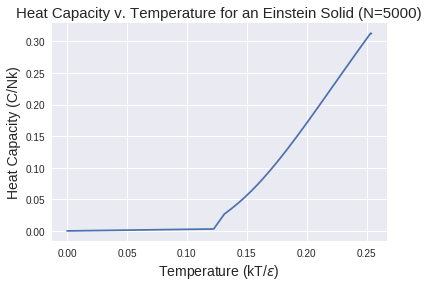

In [18]:
#Heat capacity v. temperature

plt.figure()
plt.plot(temp_norm,heatcap_norm,label='Einstein Solid')
plt.title('Heat Capacity v. Temperature for an Einstein Solid (N=5000)',fontsize=15)
plt.xlabel('Temperature (kT/$\epsilon$)',fontsize=14)
plt.ylabel('Heat Capacity (C/Nk)',fontsize=14)

The temperature per unit energy is considerably lower than that for an Einstein solid with more oscillators. Comparing to Figure 1.14, this plot best resembles the curve for diamond, whereas the curves for lead or aluminium better match the N = 50 plots. Given the description of 1.14 explicitly states that the data are for one mole of each substance, which translates for our purposes to the number of oscillators being held fixed, we cannot claim diamond best resembles N=5000 because its molecular structure is more compact and thus contains more oscillators than lead or aluminium per some unit area.

A second option is to investigate the size of $\epsilon$, as that variable encodes the amount of energy each oscillator can have (which may be due to the size of the atoms..? Dr. McColgan, please confirm!).

[I should note that https://www.quora.com/Why-do-different-materials-have-different-specific-heat-capacities helped me confirm my suspicions about $\epsilon$.]

To do so, I am going to be a bit cheeky and remove the normalization hocus pocus from the variables. In essence, I am recreating my numpy arrays but including the Boltzmann Constants n' such. I will report my findings in a text box below. If I do not return, please inform my mother I apologize about disobeying her instruction to shower this evening.

In [0]:
N = 5000
k = 1.381e-23

multiplicity = [] #for calculations
for i in q:
  mult_q = factorial(N+i-1)/(factorial(i)*factorial(N-1))
  multiplicity.append(mult_q)
multiplicity = np.array(multiplicity) #conversion to numpy array

entropy = []
for i in multiplicity:
  S_k = k * np.log(i) #S = k*ln(multiplicity)
  entropy.append(S_k)
entropy = np.array(entropy)

temp = [] 
for n in range(0,100):
  if n == 0:
    temp.append(0) #we know from the given table the first T value.
  else:
    T = (q[n+1] - q[n-1]) / (entropy[n+1] - entropy[n-1])
    temp.append(T)
temp = np.array(temp)

heatcap = []
for n in range(0,100-1):
  if n == 0:
    heatcap.append(0) #we know from the given table the first C value.
  else:
    C = (q[n+1] - q[n-1]) / (temp[n+1] - temp[n-1])
    heatcap.append(C)
heatcap.append(np.max(heatcap))
heatcap = np.array(heatcap)

(-1e-21, 4e-20)

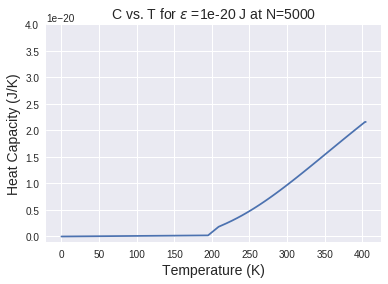

In [22]:
eps = 'dunno'
eps1 = 2.2e-20 #some arbitrary value of epsilon



plt.figure()
#plt.plot(temp_norm,heatcap_norm,label='Einstein Solid')
plt.plot(temp*eps1,heatcap,label='Einstein Solid')
#plt.title('Heat Capacity v. Temperature for an Einstein Solid (N=5000)',fontsize=15)
plt.xlabel('Temperature (K)',fontsize=14)
plt.ylabel('Heat Capacity (J/K)',fontsize=14)
plt.title('C vs. T for' ' ' '$\epsilon$' ' =1e-20 J ' 'at N=5000',fontsize=14)
plt.ylim(-0.1e-20, 4e-20)

(-1e-21, 4e-20)

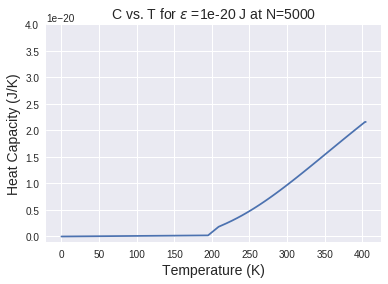

In [26]:
eps = 'dunno'
eps1 = 2.2e-20 #some arbitrary value of epsilon



plt.figure()
#plt.plot(temp_norm,heatcap_norm,label='Einstein Solid')
plt.plot(temp*eps1,heatcap,label='Einstein Solid')
#plt.title('Heat Capacity v. Temperature for an Einstein Solid (N=5000)',fontsize=15)
plt.xlabel('Temperature (K)',fontsize=14)
plt.ylabel('Heat Capacity (J/K)',fontsize=14)
plt.title('C vs. T for' ' ' '$\epsilon$' ' =1e-20 J ' 'at N=5000',fontsize=14)
plt.ylim(-0.1e-20, 4e-20)

The trend I am noticing is that as $\epsilon$ increases, heat capacity decreases.